# Decision Tree Regression Notebook

#### *Author: Kunyu He*
#### *University of Chicago, CAPP'20*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

%matplotlib notebook

### Load Data

In [4]:
salary = pd.read_csv("Position_Salaries.csv")
salary.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Data Cleaning

In [5]:
salary.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

No value missing.

### Feature Selection

In [6]:
X = salary.iloc[:, 1:2].values
X.shape

(10, 1)

In [7]:
y = salary.Salary.values
y.shape

(10,)

### Model Training

As we only have ten observations, we are using the whole data set to train our model.

In [10]:
rfr = RandomForestRegressor(n_estimators=1000, random_state=123)
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

### Model Evaluation

In [13]:
X_grid = np.arange(min(X), max(X), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))

<IPython.core.display.Javascript object>


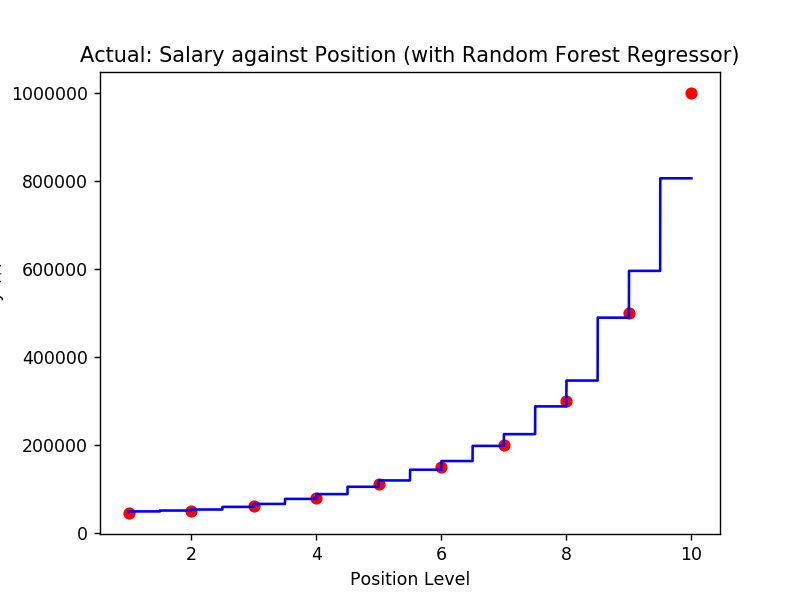

In [15]:
plt.scatter(X, y, color="red")
plt.plot(X_grid, rfr.predict(X_grid), color="blue")

plt.title("Actual: Salary against Position (with Random Forest Regressor)")
plt.xlabel("Position Level")
plt.ylabel("Salary ($)")
plt.show()

We have more steps between position levels, which makes our predictions between position levels more likely.